In [6]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_columns', None)

In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("behrad3d/nasa-cmaps")

# print("Path to dataset files:", path)

In [7]:
os.listdir(r'D:\Data Science\RUL prediction\nasa-cmaps\versions\1\CMaps')

['Damage Propagation Modeling.pdf',
 'readme.txt',
 'RUL_FD001.txt',
 'RUL_FD002.txt',
 'RUL_FD003.txt',
 'RUL_FD004.txt',
 'test_FD001.txt',
 'test_FD002.txt',
 'test_FD003.txt',
 'test_FD004.txt',
 'train_FD001.txt',
 'train_FD002.txt',
 'train_FD003.txt',
 'train_FD004.txt',
 'x.txt']

In [9]:
COLUMNS = (
    ["engine_id", "cycle"] +
    [f"op_{i}" for i in range(1, 4)] +
    [f"s{i}" for i in range(1, 22)]
)

train_path = r'D:\Data Science\RUL prediction\nasa-cmaps\versions\1\CMaps\train_FD001.txt'
test_path  = r'D:\Data Science\RUL prediction\nasa-cmaps\versions\1\CMaps\test_FD001.txt'
rul_path   = r'D:\Data Science\RUL prediction\nasa-cmaps\versions\1\CMaps\RUL_FD001.txt'

train_df = pd.read_csv(train_path, sep=r"\s+", header=None)
train_df.columns = COLUMNS


In [10]:
train_df.head()

,engine_id,cycle,op_1,op_2,op_3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [11]:
train_df.nunique()

engine_id     100
cycle         362
op_1          158
op_2           13
op_3            1
s1              1
s2            310
s3           3012
s4           4051
s5              1
s6              2
s7            513
s8             53
s9           6403
s10             1
s11           159
s12           427
s13            56
s14          6078
s15          1918
s16             1
s17            13
s18             1
s19             1
s20           120
s21          4745
dtype: int64

In [12]:
DROP_COLS = [
    "op_3", "s1", "s5", "s6", "s10", "s16", "s18", "s19"
]

train_df = train_df.drop(columns=DROP_COLS)


In [13]:
# max cycle per engine
max_cycles = train_df.groupby("engine_id")["cycle"].max()

# compute RUL
train_df["RUL"] = train_df.apply(
    lambda row: max_cycles[row.engine_id] - row.cycle,
    axis=1
)

# cap RUL 
RUL_CAP = 125
train_df["RUL"] = train_df["RUL"].clip(upper=RUL_CAP)


In [14]:
train_df.head()

,engine_id,cycle,op_1,op_2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,125.0
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,125.0
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,125.0
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,125.0
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,125.0


In [15]:
from sklearn.preprocessing import StandardScaler

FEATURE_COLS = [c for c in train_df.columns if c not in ["engine_id", "cycle", "RUL"]]

scaler = StandardScaler()
train_df[FEATURE_COLS] = scaler.fit_transform(train_df[FEATURE_COLS])


In [16]:
WINDOW = 30

def create_windows(df, window):
    X, y = [], []

    for engine_id, engine_df in df.groupby("engine_id"):
        data = engine_df.sort_values("cycle")
        features = data[FEATURE_COLS].values
        labels = data["RUL"].values

        for i in range(len(data) - window + 1):
            X.append(features[i:i+window])
            y.append(labels[i+window-1])

    return np.array(X), np.array(y)

X_train, y_train = create_windows(train_df, WINDOW)

print(X_train.shape)  # (samples, 30, features)
print(y_train.shape)


(17731, 30, 16)
(17731,)


In [17]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


In [18]:
import torch
import torch.nn as nn

class RULLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        return self.fc(h_n[-1])


In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
model = RULLSTM(input_dim=X_train.shape[2]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def train_epoch(X, y, batch_size=64):
    model.train()
    perm = np.random.permutation(len(X))

    total_loss = 0
    for i in range(0, len(X), batch_size):
        idx = perm[i:i+batch_size]
        xb = torch.tensor(X[idx], dtype=torch.float32).to(device)
        yb = torch.tensor(y[idx], dtype=torch.float32).to(device)

        optimizer.zero_grad()
        preds = model(xb).squeeze()
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / (len(X) // batch_size)


cuda


In [20]:
EPOCHS = 20

for epoch in range(EPOCHS):
    loss = train_epoch(X_tr, y_tr)
    print(f"Epoch {epoch+1}/{EPOCHS} | Train MSE: {loss:.4f}")


Epoch 1/20 | Train MSE: 6703.0814
Epoch 2/20 | Train MSE: 4722.1097
Epoch 3/20 | Train MSE: 3442.2294
Epoch 4/20 | Train MSE: 2510.1615
Epoch 5/20 | Train MSE: 1808.2629
Epoch 6/20 | Train MSE: 1287.8383
Epoch 7/20 | Train MSE: 931.1429
Epoch 8/20 | Train MSE: 679.9458
Epoch 9/20 | Train MSE: 504.5799
Epoch 10/20 | Train MSE: 382.6946
Epoch 11/20 | Train MSE: 298.0626
Epoch 12/20 | Train MSE: 246.9331
Epoch 13/20 | Train MSE: 202.5287
Epoch 14/20 | Train MSE: 174.7887
Epoch 15/20 | Train MSE: 158.9793
Epoch 16/20 | Train MSE: 144.1896
Epoch 17/20 | Train MSE: 135.7062
Epoch 18/20 | Train MSE: 129.9715
Epoch 19/20 | Train MSE: 120.5690
Epoch 20/20 | Train MSE: 116.9484


In [21]:
model.eval()
with torch.no_grad():
    Xv = torch.tensor(X_val, dtype=torch.float32).to(device)
    preds = model(Xv).cpu().numpy().squeeze()

rmse = np.sqrt(np.mean((preds - y_val) ** 2))
print("Validation RMSE:", rmse)


Validation RMSE: 11.619772848953426


In [22]:
test_df = pd.read_csv(test_path, sep=r"\s+", header=None)
test_df.columns = COLUMNS

# drop same columns as training
test_df = test_df.drop(columns=DROP_COLS)

# normalize using TRAIN scaler
test_df[FEATURE_COLS] = scaler.transform(test_df[FEATURE_COLS])


In [23]:
def create_test_windows(df, window):
    X = []
    engine_ids = []

    for engine_id, engine_df in df.groupby("engine_id"):
        data = engine_df.sort_values("cycle")
        features = data[FEATURE_COLS].values

        if len(features) < window:
            # left-pad with first row
            pad = np.repeat(features[0:1], window - len(features), axis=0)
            features = np.vstack([pad, features])
        else:
            features = features[-window:]

        X.append(features)
        engine_ids.append(engine_id)

    return np.array(X), engine_ids

X_test, engine_ids = create_test_windows(test_df, WINDOW)


In [24]:
true_rul = pd.read_csv(rul_path, header=None).values.squeeze()

assert len(true_rul) == len(X_test)


In [25]:
model.eval()
with torch.no_grad():
    Xt = torch.tensor(X_test, dtype=torch.float32).to(device)
    pred_rul = model(Xt).cpu().numpy().squeeze()


In [26]:
rmse = np.sqrt(np.mean((pred_rul - true_rul) ** 2))
print("Test RMSE:", rmse)


Test RMSE: 15.084994421327295


In [27]:
# d_i = pred_i - true_i

# if d_i < 0:
#     s_i = exp(-d_i / 13) - 1
# else:
#     s_i = exp(d_i / 10) - 1


In [28]:
def nasa_score(y_true, y_pred):
    score = 0.0
    for t, p in zip(y_true, y_pred):
        d = p - t
        if d < 0:
            score += np.exp(-d / 13) - 1
        else:
            score += np.exp(d / 10) - 1
    return score

score = nasa_score(true_rul, pred_rul)
print("NASA Score:", score)


NASA Score: 342.49628917422194


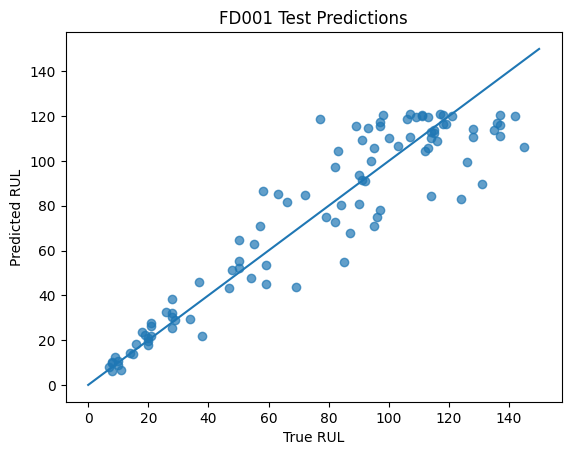

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(true_rul, pred_rul, alpha=0.7)
plt.plot([0, 150], [0, 150])
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("FD001 Test Predictions")
plt.show()


In [37]:
MODEL_PATH = "artifacts/rul_lstm_fd001.pth"

torch.save(model.state_dict(), MODEL_PATH)


In [38]:
import pickle

SCALER_PATH = "artifacts/scaler_fd001.pkl"
FEATURES_PATH = "artifacts/features_fd001.pkl"

# Save scaler
with open(SCALER_PATH, "wb") as f:
    pickle.dump(scaler, f)

# Save feature column order
with open(FEATURES_PATH, "wb") as f:
    pickle.dump(FEATURE_COLS, f)


In [39]:
ARCH_PATH = "artifacts/model_arch_fd001.pkl"

model_meta = {
    "input_dim": X_train.shape[2],
    "hidden_dim": 64,
    "window": WINDOW
}

with open(ARCH_PATH, "wb") as f:
    pickle.dump(model_meta, f)
